## Import Library

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

## Load Dataset

In [3]:
df = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Preview Data

In [4]:
df.head()              # Lihat 5 baris pertama
df.info()              # Cek struktur data
df.describe()          # Statistik deskriptif kolom numerik
df.isnull().sum()      # Cek missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Cek Tipe Data

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Konversi TotalCharges ke Numerik

In [6]:
# Mengubah TotalCharges ke float (karena awalnya object), dan tangani error non-numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Cek kembali missing value setelah konversi
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Tangani Missing Value

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Cek Statistik Deskriptif

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Visualisasi Distribusi Numerik (Univariate Analysis)

Histogram

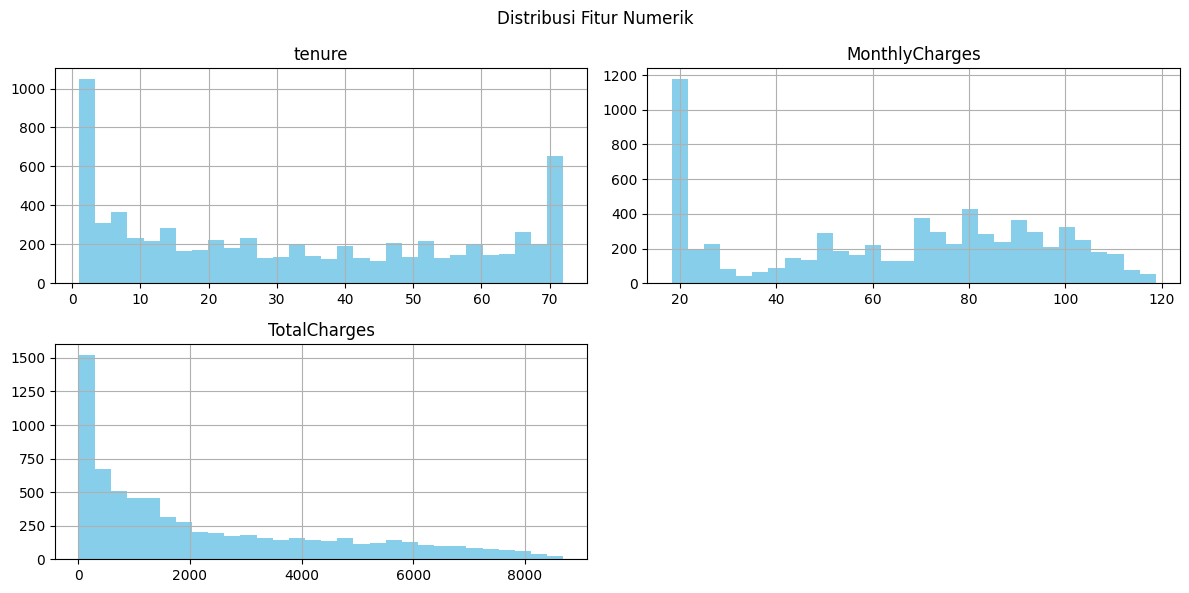

In [10]:
numerik_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numerik_cols].hist(bins=30, figsize=(12, 6), color='skyblue')
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()


Boxplot untuk Deteksi Outlier

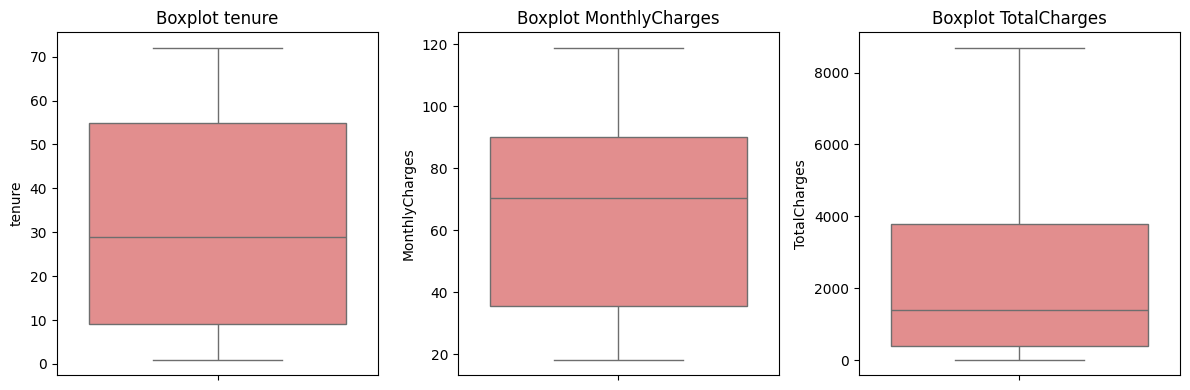

In [11]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(numerik_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


### Cek Korelasi antar Fitur Numerik

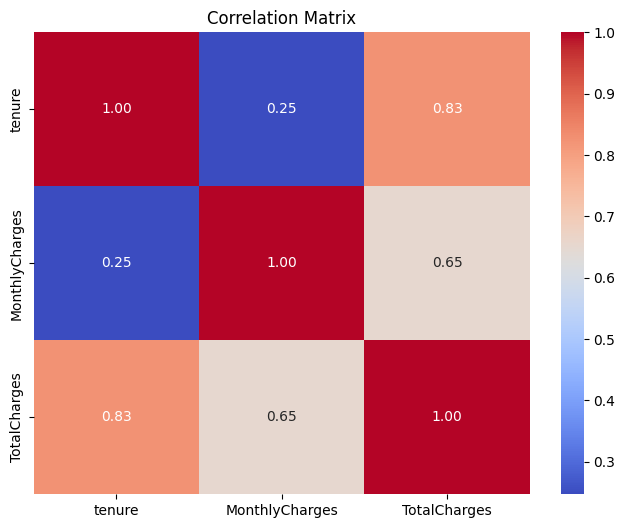

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerik_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Analisis Fitur Kategorikal (Univariate dan Bivariate)

Cek Jumlah Kategori

In [13]:
kategori_cols = df.select_dtypes(include='object').columns.tolist()
kategori_cols.remove('customerID')  # kita abaikan karena bukan fitur analisis

for col in kategori_cols:
    print(f"\n{col}:\n", df[col].value_counts())



gender:
 gender
Male      3549
Female    3483
Name: count, dtype: int64

Partner:
 Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents:
 Dependents
No     4933
Yes    2099
Name: count, dtype: int64

PhoneService:
 PhoneService
Yes    6352
No      680
Name: count, dtype: int64

MultipleLines:
 MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

InternetService:
 InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

OnlineSecurity:
 OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

OnlineBackup:
 OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

DeviceProtection:
 DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

TechSupport:
 TechSup

Visualisasi Distribusi Churn berdasarkan Tipe Kontrak

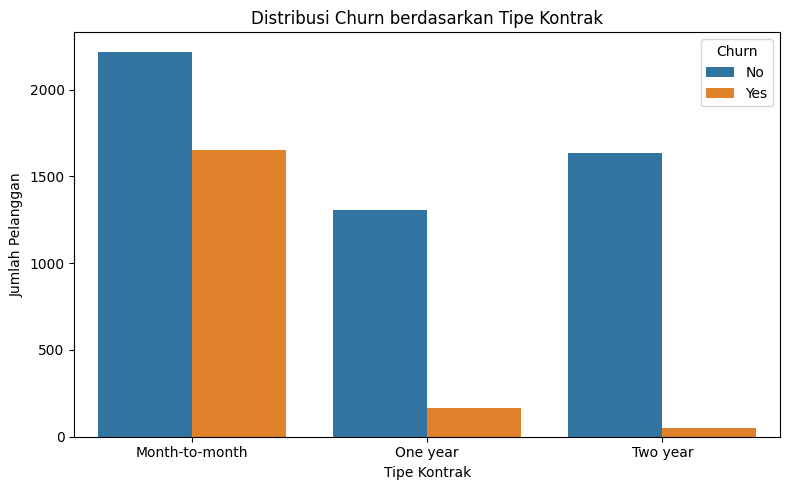

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Distribusi Churn berdasarkan Tipe Kontrak')
plt.xlabel('Tipe Kontrak')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Visualisasi Univariate Fitur Kategorikal

C:\Users\Yoga Samudra\AppData\Local\Temp\ipykernel_21800\297016457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
C:\Users\Yoga Samudra\AppData\Local\Temp\ipykernel_21800\297016457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
C:\Users\Yoga Samudra\AppData\Local\Temp\ipykernel_21800\297016457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().ind

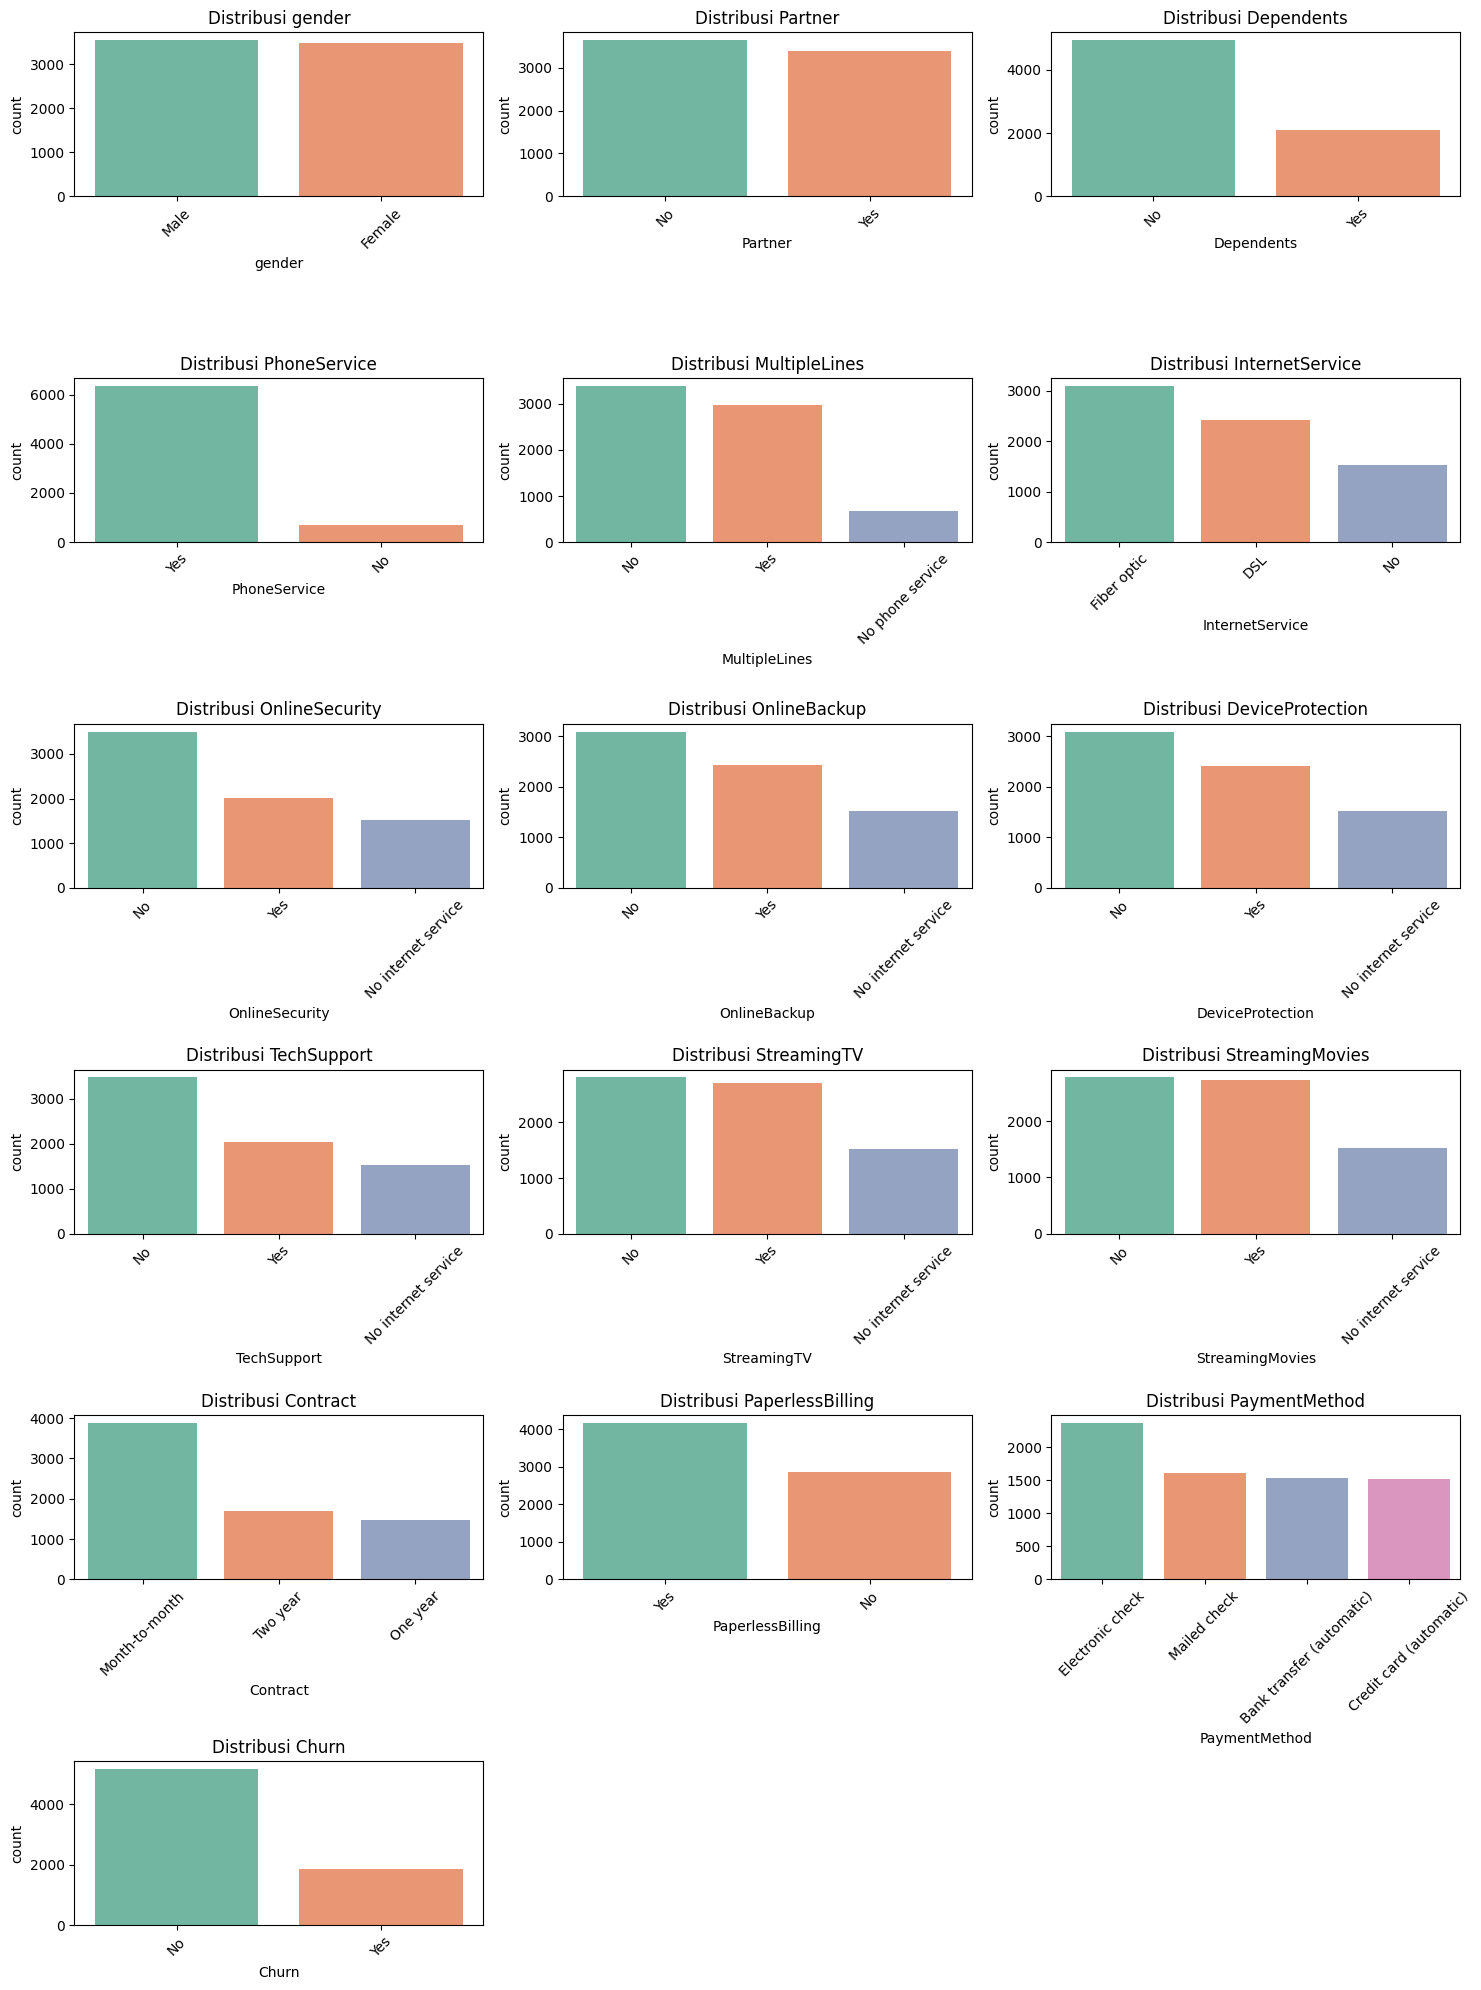

In [15]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(kategori_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


In [16]:
kategori_cols = df.select_dtypes(include='object').columns.tolist()
kategori_cols.remove('customerID')  # customerID bukan fitur analisis

for col in kategori_cols:
    print(f"Distribusi nilai '{col}':")
    print(df[col].value_counts())
    print("\n" + "-"*40 + "\n")


Distribusi nilai 'gender':
gender
Male      3549
Female    3483
Name: count, dtype: int64

----------------------------------------

Distribusi nilai 'Partner':
Partner
No     3639
Yes    3393
Name: count, dtype: int64

----------------------------------------

Distribusi nilai 'Dependents':
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

----------------------------------------

Distribusi nilai 'PhoneService':
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

----------------------------------------

Distribusi nilai 'MultipleLines':
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

----------------------------------------

Distribusi nilai 'InternetService':
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

----------------------------------------

Distribusi nilai 'OnlineSecurity':
OnlineSecurity
No                     3497
Yes          

Visualisasi Bivariate (Churn vs Fitur Kategorikal)

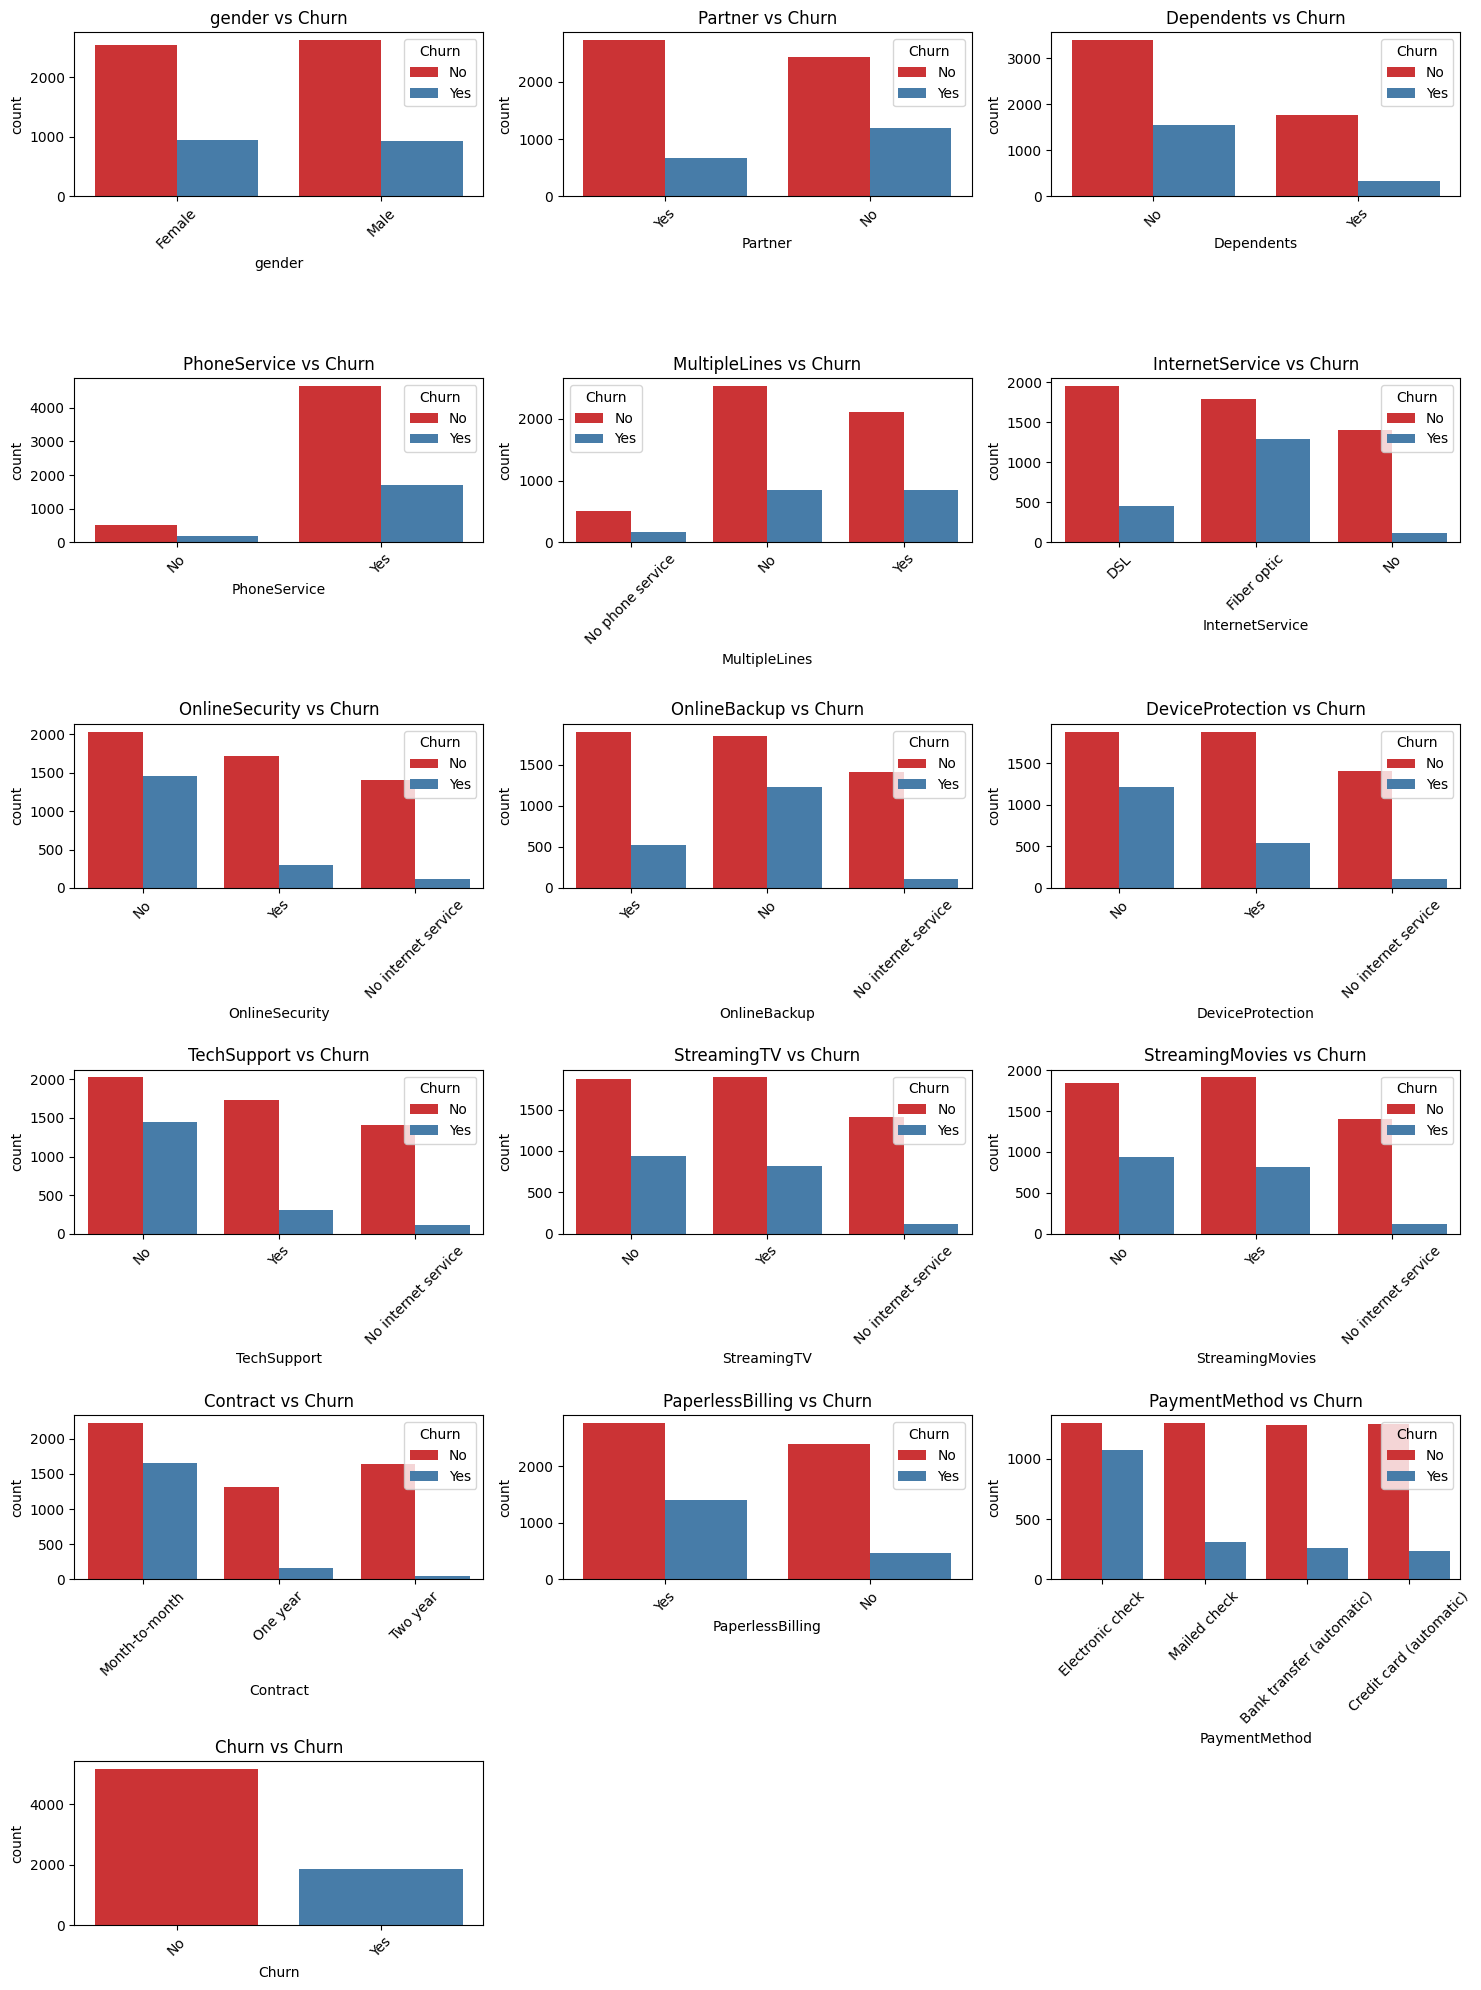

In [17]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(kategori_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()


In [18]:
for col in kategori_cols:
    print(f"Distribusi Churn berdasarkan '{col}':")
    print(pd.crosstab(df[col], df['Churn'], normalize='index').round(2))
    print("\n" + "-"*50 + "\n")


Distribusi Churn berdasarkan 'gender':
Churn     No   Yes
gender            
Female  0.73  0.27
Male    0.74  0.26

--------------------------------------------------

Distribusi Churn berdasarkan 'Partner':
Churn      No   Yes
Partner            
No       0.67  0.33
Yes      0.80  0.20

--------------------------------------------------

Distribusi Churn berdasarkan 'Dependents':
Churn         No   Yes
Dependents            
No          0.69  0.31
Yes         0.84  0.16

--------------------------------------------------

Distribusi Churn berdasarkan 'PhoneService':
Churn           No   Yes
PhoneService            
No            0.75  0.25
Yes           0.73  0.27

--------------------------------------------------

Distribusi Churn berdasarkan 'MultipleLines':
Churn               No   Yes
MultipleLines               
No                0.75  0.25
No phone service  0.75  0.25
Yes               0.71  0.29

--------------------------------------------------

Distribusi Churn berdasarkan 

### Visualisasi Univariate & Bivariate untuk Fitur Numerik

Visualisasi Univariate – Distribusi Nilai

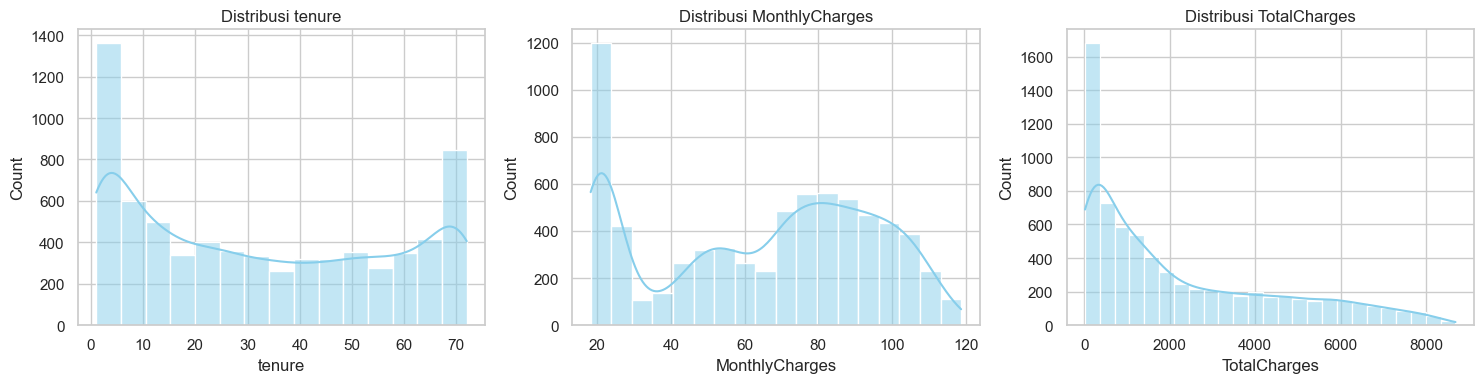

In [19]:
# Set style
sns.set(style='whitegrid')

# Fitur numerik
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot distribusi
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

In [35]:
# Fitur numerik
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Tampilkan statistik deskriptif
df[num_cols].describe()


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Visualisasi Bivariate – Fitur Numerik vs Target Churn

C:\Users\Yoga Samudra\AppData\Local\Temp\ipykernel_21800\3367263412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
C:\Users\Yoga Samudra\AppData\Local\Temp\ipykernel_21800\3367263412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
C:\Users\Yoga Samudra\AppData\Local\Temp\ipykernel_21800\3367263412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='Set2')


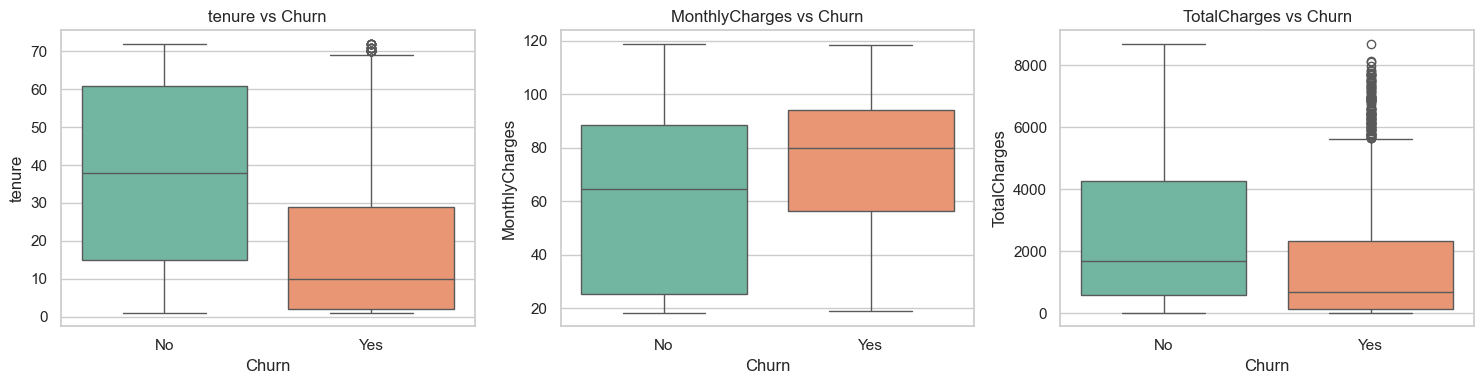

In [20]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()


In [21]:
# Hitung rata-rata dari fitur numerik untuk masing-masing nilai Churn
df.groupby('Churn')[num_cols].mean()


,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.650010,61.307408,2555.344141
Yes,17.979133,74.441332,1531.796094


### Korelasi dan Visualisasi Fitur Numerik

Korelasi antar Fitur Numerik

In [22]:
# Korelasi antar fitur numerik
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = df[numerical_features].corr()
print("Korelasi antar fitur numerik:")
print(correlation_matrix)


Korelasi antar fitur numerik:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


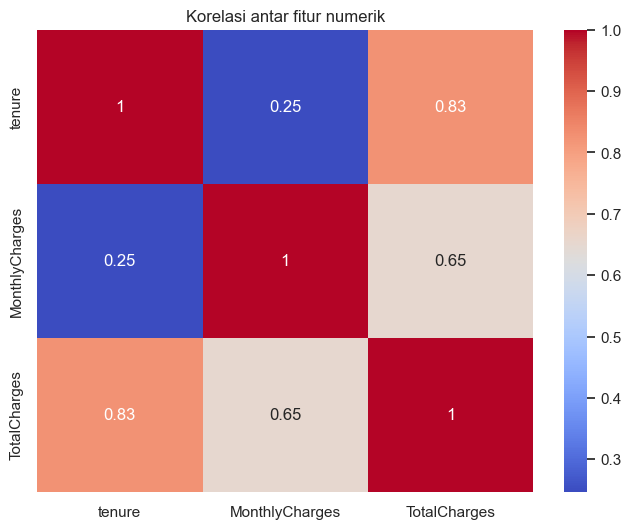

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur numerik')
plt.show()


Korelasi antara Fitur Numerik dan Target (Churn)

In [24]:
# Ubah kolom Churn menjadi numerik: Yes = 1, No = 0
df['Churn_numerik'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Hitung korelasi setiap fitur numerik dengan churn
for col in numerical_features:
    corr = df[col].corr(df['Churn_numerik'])
    print(f"Korelasi antara {col} dan Churn: {corr:.4f}")


Korelasi antara tenure dan Churn: -0.3540
Korelasi antara MonthlyCharges dan Churn: 0.1929
Korelasi antara TotalCharges dan Churn: -0.1995


### Visualisasi Multivariate Fitur Numerik

In [44]:
# Langkah 13.1: Buat kategori churn numerik untuk korelasi
df['Churn_numerik'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Langkah 13.2: Hitung korelasi antara fitur numerik dan Churn_numerik
korelasi_multivariat = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numerik']].corr()
print("Korelasi Multivariat terhadap Churn_numerik:")
print(korelasi_multivariat['Churn_numerik'].sort_values(ascending=False))


Korelasi Multivariat terhadap Churn_numerik:
Churn_numerik     1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn_numerik, dtype: float64


## Modeling

### Training & Evaluasi Model

Persiapan Data

In [ ]:
# Persiapan Data
X = df.drop(['customerID', 'Churn', 'Churn_numerik'], axis=1)
y = df['Churn_numerik']

# One-hot encoding untuk fitur kategorikal
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

Modeling Logistic Regression

In [59]:
# Standardisasi untuk Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))



=== Logistic Regression ===
Akurasi: 0.8038379530916845
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Confusion Matrix:
 [[916 117]
 [159 215]]


Visualisasi Model Logistic Regression

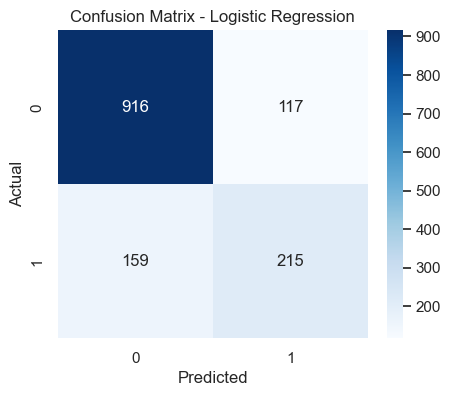

In [60]:

# Visualisasi Confusion Matrix - Logistic Regression
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Modeling Random Forest

In [61]:
# 5. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest ===
Akurasi: 0.7903340440653873
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[929 104]
 [191 183]]


Visualisasi Model Random Forest

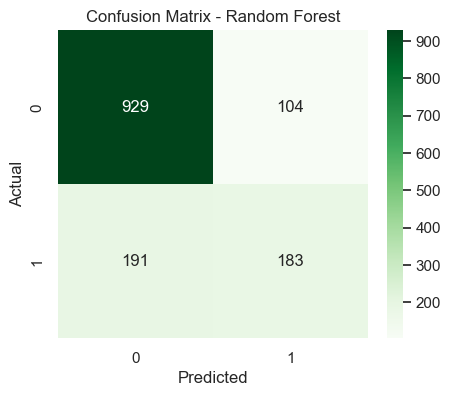

In [62]:
# Visualisasi Confusion Matrix - Random Forest
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Hyperparameter Tuning**

In [66]:
# === Logistic Regression Tuning ===
param_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

best_logreg = grid_logreg.best_estimator_
y_pred_logreg_tuned = best_logreg.predict(X_test)

print("=== Tuned Logistic Regression ===")
print("Best Params:", grid_logreg.best_params_)
print("Akurasi:", accuracy_score(y_test, y_pred_logreg_tuned))
print(classification_report(y_test, y_pred_logreg_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_tuned))

=== Tuned Logistic Regression ===
Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Akurasi: 0.8024164889836531
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

Confusion Matrix:
 [[927 106]
 [172 202]]


In [68]:
# === Random Forest Tuning ===
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

print("\n=== Tuned Random Forest ===")
print("Best Params:", grid_rf.best_params_)
print("Akurasi:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))


=== Tuned Random Forest ===
Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Akurasi: 0.7931769722814499
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

Confusion Matrix:
 [[919 114]
 [177 197]]


## Evaluation

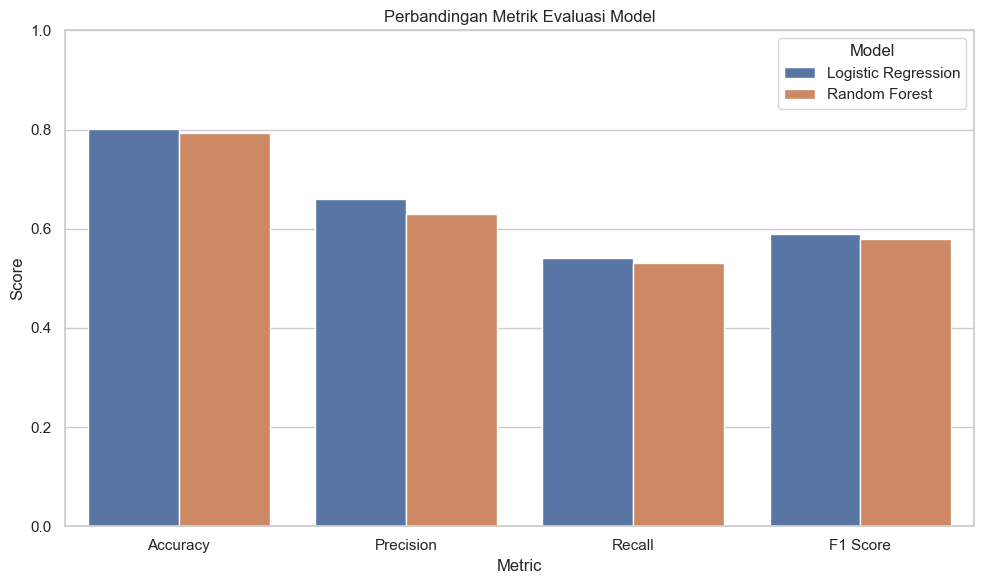

In [71]:
# 1. Visualisasi perbandingan metrik
metrics_logreg = {
    'Model': 'Logistic Regression',
    'Accuracy': 0.802,
    'Precision': 0.66,
    'Recall': 0.54,
    'F1 Score': 0.59
}

metrics_rf = {
    'Model': 'Random Forest',
    'Accuracy': 0.793,
    'Precision': 0.63,
    'Recall': 0.53,
    'F1 Score': 0.58
}

import pandas as pd
metrics_df = pd.DataFrame([metrics_logreg, metrics_rf])
metrics_df_melt = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10,6))
sns.barplot(data=metrics_df_melt, x='Metric', y='Score', hue='Model')
plt.title('Perbandingan Metrik Evaluasi Model')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

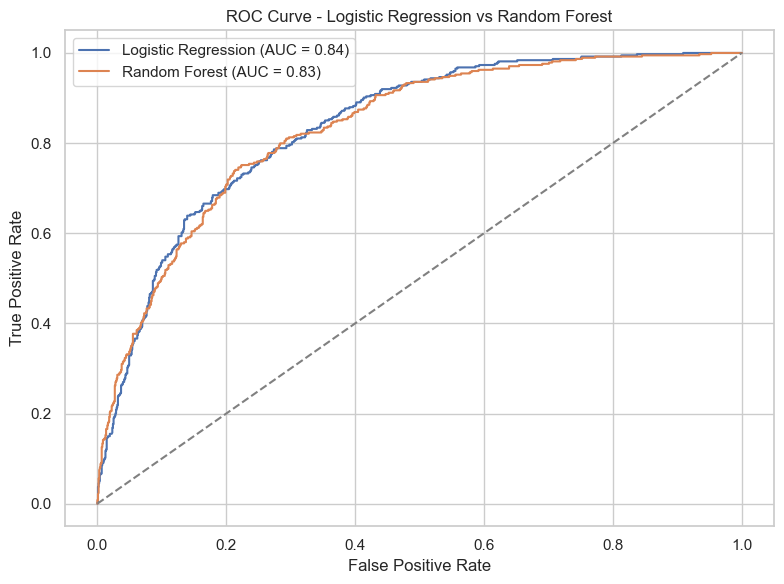

In [74]:
# 2. ROC Curve & AUC Score

# Probabilitas prediksi
y_prob_logreg = best_logreg.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# AUC Score
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression vs Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
